# Module 1.3 homogeneous combustion in reactors
## constant pressure and constant volume reactors

See https://cantera.org/science/reactors.html

Homogeneous combustion is the combustion of a homogeneous mixture. Think of a small sphere containing a perfectly mixed mixture of fuel and oxidizer. A batch reactor is a reactor where a fixed amount of fuel reacts in a closed volume. Several assumptions can be chosen for the volume. One is to consider a constant pressure reactor. In that case, the volume changes in time to keep the pressure constant. We consider such a constan pressure reactor here. 

In [1]:
# use notebook for jupyter notebook
#%matplotlib notebook
# use inline for jupyter labs
%matplotlib inline
import sys
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

We will put a mixture of hydrogen and air into a volume and keep the pressure constant.

In [2]:
"""
Constant-pressure, adiabatic kinetics simulation.
"""

# use the GRI 3.0 mechanism
gas = ct.Solution('gri30.xml')
# set the temperature, pressure and the initial mole fractions of 
# all the species present in the mixture.
gas.TPX = 1001.0, ct.one_atm, 'H2:2,O2:1,N2:4'
r = ct.IdealGasConstPressureReactor(gas)

sim = ct.ReactorNet([r])
time = 0.0
# only a gaseous state, we add time 't' as an extra property
states = ct.SolutionArray(gas, extra=['t'])

print('%10s %10s %10s %10s %14s' % ('t [s]','T [K]','P [Pa]','V [m^3]','u [J/kg]'))
for n in range(100):
    time += 1.e-5
    sim.advance(time)
    states.append(r.thermo.state, t=time*1e3)
    print('%10.3e %10.3f %10.3f %10.3f %14.6e' % (sim.time, r.T, r.thermo.P, r.volume, r.thermo.u))

     t [s]      T [K]     P [Pa]    V [m^3]       u [J/kg]
 1.000e-05   1001.000 101325.000      1.000   6.207683e+05
 2.000e-05   1001.000 101325.000      1.000   6.207683e+05
 3.000e-05   1001.000 101325.000      1.000   6.207683e+05
 4.000e-05   1001.000 101325.000      1.000   6.207683e+05
 5.000e-05   1001.000 101325.000      1.000   6.207683e+05
 6.000e-05   1001.000 101325.000      1.000   6.207682e+05
 7.000e-05   1001.000 101325.000      1.000   6.207682e+05
 8.000e-05   1001.000 101325.000      1.000   6.207682e+05
 9.000e-05   1001.001 101325.000      1.000   6.207681e+05
 1.000e-04   1001.001 101325.000      1.000   6.207680e+05
 1.100e-04   1001.001 101325.000      1.000   6.207678e+05
 1.200e-04   1001.002 101325.000      1.000   6.207676e+05
 1.300e-04   1001.003 101325.000      1.000   6.207672e+05
 1.400e-04   1001.005 101325.000      1.000   6.207665e+05
 1.500e-04   1001.008 101325.000      1.000   6.207656e+05
 1.600e-04   1001.012 101325.000      1.000   6.207640e+

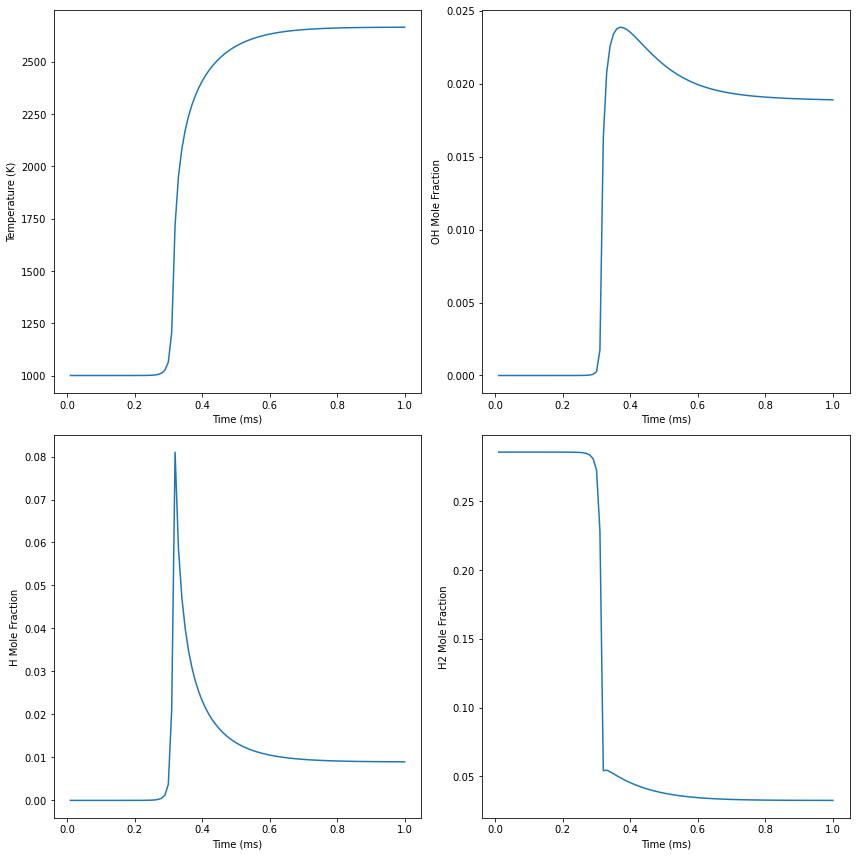

In [3]:
# globally change the size of all plots
plt.rcParams['figure.figsize'] = [12, 12]

plt.clf()
# 2 x 2 plot, start counting at 1 
plt.subplot(2, 2, 1)
plt.plot(states.t, states.T)
plt.xlabel('Time (ms)')
plt.ylabel('Temperature (K)')
plt.subplot(2, 2, 2)
plt.plot(states.t, states.X[:,gas.species_index('OH')])
plt.xlabel('Time (ms)')
plt.ylabel('OH Mole Fraction')
plt.subplot(2, 2, 3)
plt.plot(states.t, states.X[:,gas.species_index('H')])
plt.xlabel('Time (ms)')
plt.ylabel('H Mole Fraction')
plt.subplot(2, 2, 4)
plt.plot(states.t, states.X[:,gas.species_index('H2')])
plt.xlabel('Time (ms)')
plt.ylabel('H2 Mole Fraction')
plt.tight_layout()
plt.show()

In [4]:
"""
Constant-volume, adiabatic kinetics simulation.
"""

# use the GRI 3.0 mechanism
gas2 = ct.Solution('gri30.xml')
# set the temperature, pressure and the initial mole fractions of 
# all the species present in the mixture.
gas2.TPX = 1001.0, ct.one_atm, 'H2:2,O2:1,N2:4'
r2 = ct.Reactor(gas2)

sim2 = ct.ReactorNet([r2])
time = 0.0
# only a gaseous state, we add time 't' as an extra property
states2 = ct.SolutionArray(gas2, extra=['t'])

print('%10s %10s %10s %10s %14s' % ('t [s]','T [K]','P [Pa]','V [m^3]', 'u [J/kg]'))
for n in range(100):
    time += 1.e-5
    sim2.advance(time)
    states2.append(r2.thermo.state, t=time*1e3)
    print('%10.3e %10.3f %10.3f %10.3f %14.6e' % (sim2.time, r2.T,
                                           r2.thermo.P, r2.volume, r2.thermo.u))

     t [s]      T [K]     P [Pa]    V [m^3]       u [J/kg]
 1.000e-05   1001.000 101325.000      1.000   6.207683e+05
 2.000e-05   1001.000 101325.000      1.000   6.207683e+05
 3.000e-05   1001.000 101325.001      1.000   6.207683e+05
 4.000e-05   1001.000 101325.003      1.000   6.207683e+05
 5.000e-05   1001.000 101325.006      1.000   6.207683e+05
 6.000e-05   1001.000 101325.012      1.000   6.207683e+05
 7.000e-05   1001.000 101325.021      1.000   6.207683e+05
 8.000e-05   1001.000 101325.036      1.000   6.207683e+05
 9.000e-05   1001.001 101325.060      1.000   6.207683e+05
 1.000e-04   1001.001 101325.097      1.000   6.207683e+05
 1.100e-04   1001.002 101325.155      1.000   6.207683e+05
 1.200e-04   1001.003 101325.245      1.000   6.207683e+05
 1.300e-04   1001.004 101325.385      1.000   6.207683e+05
 1.400e-04   1001.007 101325.602      1.000   6.207683e+05
 1.500e-04   1001.010 101325.942      1.000   6.207683e+05
 1.600e-04   1001.016 101326.471      1.000   6.207683e+

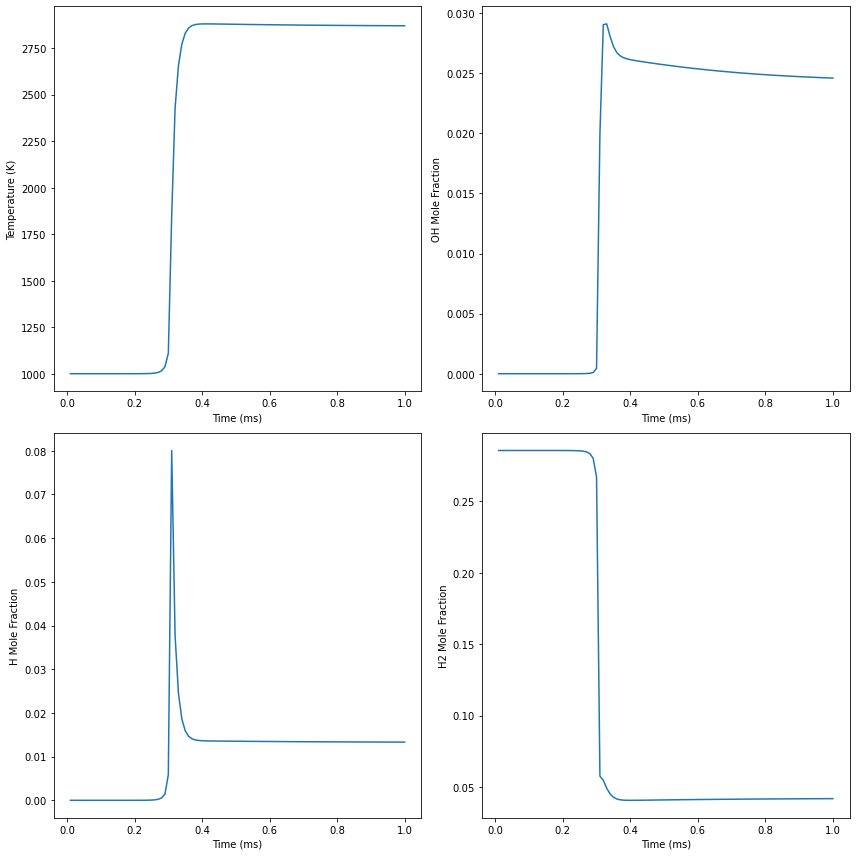

In [5]:
plt.clf()
# 2 x 2 plot, start counting at 1 
plt.subplot(2, 2, 1)
plt.plot(states2.t, states2.T)
plt.xlabel('Time (ms)')
plt.ylabel('Temperature (K)')
plt.subplot(2, 2, 2)
plt.plot(states2.t, states2.X[:,gas2.species_index('OH')])
plt.xlabel('Time (ms)')
plt.ylabel('OH Mole Fraction')
plt.subplot(2, 2, 3)
plt.plot(states2.t, states2.X[:,gas2.species_index('H')])
plt.xlabel('Time (ms)')
plt.ylabel('H Mole Fraction')
plt.subplot(2, 2, 4)
plt.plot(states2.t, states2.X[:,gas2.species_index('H2')])
plt.xlabel('Time (ms)')
plt.ylabel('H2 Mole Fraction')
plt.tight_layout()
plt.show()

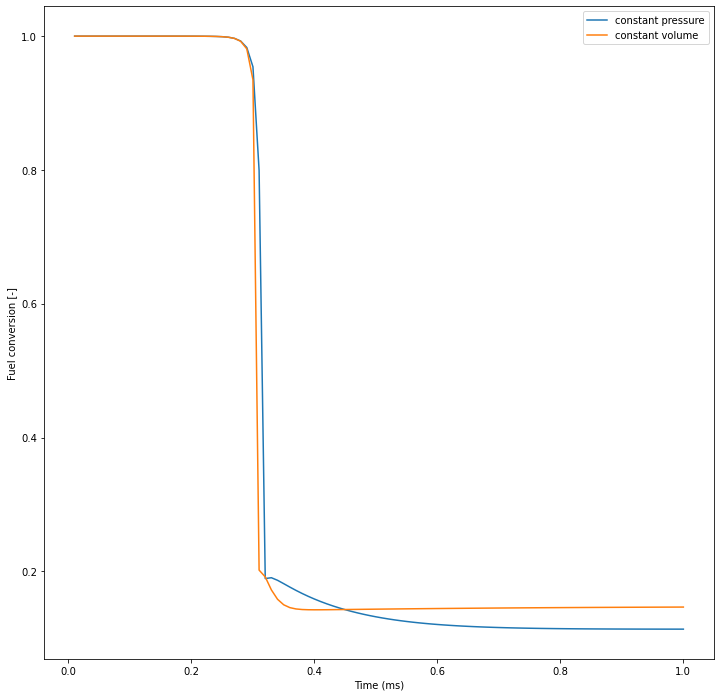

In [6]:
# conversion of fuel for constant pressure and constant volume reactor
H2_start = states.X[:,gas.species_index('H2')][0]
plt.plot(states.t,states.X[:,gas.species_index('H2')]/H2_start,label='constant pressure')
plt.plot(states2.t,states2.X[:,gas2.species_index('H2')]/H2_start,label='constant volume')
plt.xlabel('Time (ms)')
plt.ylabel('Fuel conversion [-]')
plt.legend()
plt.show()